In [2]:
import pandas as pd
import numpy as np
import os

#### Loading coefficients file

In [ ]:
# Reynolds number and amplitude of the jet
Re = '775'
Amp = '0.025'

# Loading the coefficients file
df = pd.read_csv(f'{Re}_{Amp}/coefficients.csv', sep=';')
df.head()

# Example 1
Loading and plotting the jet with the shortest $drop~~0$, i.e. with the minimal breakup length using both matplotlib ang gnuplot.

In [11]:
# Index (row number) of the minimal breakup length
idx = df['Width'].idxmin()
# Time of the minimal breakup length
time = df.iloc[idx]['Time']
# Loading the associated file containing the VOF segment of the interface
filename = f'{Re}_{Amp}/interfaces_{Re}_{Amp}_{time}.dat'

###  Plotting the interface using matplotlib

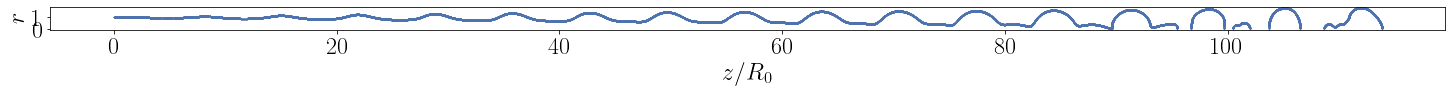

In [39]:

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#-----------------------------
# To use Latex in labels
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 24}
matplotlib.rc('font', **font)
matplotlib.rcParams['text.usetex'] = True
#-----------------------------

# Loading interface file
interface = pd.read_csv(filename,sep=' ', names=['x','y'])  

# Plotting
plt.figure(figsize=(25, 2))
plt.plot(interface.x, interface.y, '.', markersize=1)
plt.axis('scaled') 
plt.xlabel('$z/R_0$')
plt.ylabel('$r$')
plt.show()

### Plotting the interface using gnuplot
The output is written in a png file named *example_1.png* and then loaded and plotted in the notebook.

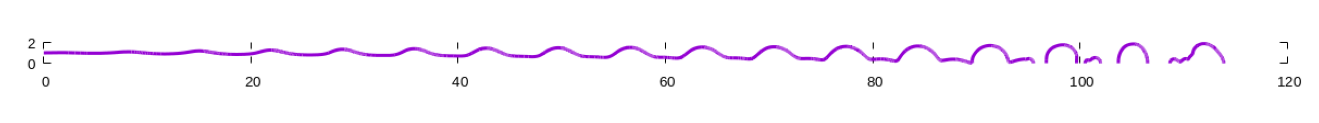

In [42]:
'''
        The package that allows to plot gnuplot file from python is *py-gnuplot*
        Details: https://pypi.org/project/py-gnuplot/
        Intall: pip install py-gnuplot
'''
from pygnuplot import gnuplot

g = gnuplot.Gnuplot(
        terminal = 'pngcairo font "arial,10" fontscale 1.0 size 1200, 100',
        output = '"example_1.png"',

        size = 'ratio -1',
        # linetype= f'1 lc rgb "{colors[0]}"',
        style = "fill transparent solid 0.75 noborder",
        border = None,
        ytics =  [0,2,2]
        )
    
g.plot(f'"{filename}" using 1:2 with lines lw 3 notitle')

img = mpimg.imread('./example_1.png')
plt.figure(figsize=(25, 2))
plt.imshow(img)
plt.axis('off')
plt.show()

## Example 2 
Plotting a sequence of $n$ jets in the same figure.

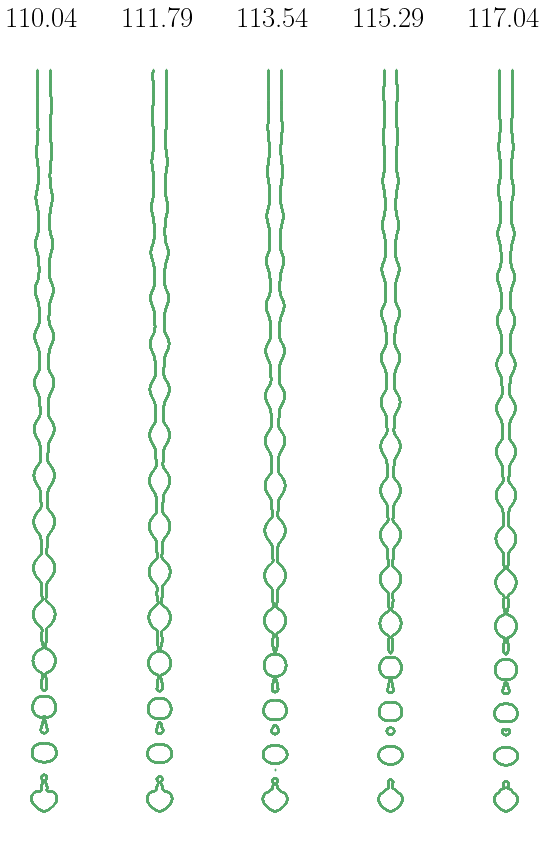

In [48]:

plt.style.use('seaborn-deep')
colors = (plt.rcParams['axes.prop_cycle'].by_key()['color'])

time =  df.Time.iloc[0]


n = 5 # number of jets to plot
freq = np.floor(101/n) # 
times_to_plot = np.round(time + np.linspace(0,n,num=n)*freq*0.07, 2) # array containing equally-spaced times

# Creating a figure gathering plots
f, axarr = plt.subplots(1, n)
f.set_figheight(15)
f.set_figwidth(10)

# Loop over times to plot 
for idx, tm in enumerate(times_to_plot):
    interface_file=f'{Re}_{Amp}/interfaces_{Re}_{Amp}_{tm:.2f}.dat'
    df_t = pd.read_csv(interface_file, sep=' ', names=['x', 'y'])
    
    axarr[idx].plot(-df_t.y, -df_t.x, '.', color=colors[1],markersize=1)
    axarr[idx].plot(df_t.y, -df_t.x,'.', color=colors[1],markersize=1)

    axarr[idx].set_title(f'{tm}')
    axarr[idx].axis('scaled')
    axarr[idx].axis('off')
    
plt.show()